<a href="https://colab.research.google.com/github/bigvisionai/opencv-webinar-poisson-image-editing/blob/main/Seamless_Cloning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font style = "color:rgb(50,120,229)">Seamless Cloning</font>

| <img src="https://www.learnopencv.com/wp-content/uploads/2015/01/seamless-cloning-example.jpg" alt=" Seamless Cloning Example" width="600"/> |
| --- |
| <center>Figure 1 : Seamless Cloning Example : An airplane cloned into the picture of an evening sky.</center> |

You can use arithmetic and bitwise operations to blend one image on another. However, It is difficult to get good results when there is a huge color difference between the two images. There are more advanced methods which help perform this kind of blending which can be useful in many applications which require you to blend images and make them look natural and real.

The above image was created using a scene of a sky and that of an airplane.  If I had simply overlaid the airplane image on top of the sky image, the result would look ridiculous (See Figure 2).

| <img src="https://www.learnopencv.com/wp-content/uploads/2015/02/sky-with-plane.jpg" alt="Sky with plane overlaid." width="600"/> |
| --- |
| <center>Figure 2 : Sky with plane overlaid.</center> |


Now of course nobody in their right mind would do a composition like that. You would obviously mask the image out carefully, and perhaps after spending half a day in Photoshop get an image that looks like Figure 3.

| <img src="https://www.learnopencv.com/wp-content/uploads/2015/02/sky-with-plane-masked.jpg" alt="Sky with plane overlaid." width="600"/> |
| --- |
| <center>Figure 3 : Sky image with airplane overlaid with careful masking.</center> |

If you are an artist you would spend another half day and carefully adjust the lighting on the airplane to the lighting of the sky image and create a beautiful composition.


Wouldn’t it be cool if you could make a very rough mask around the airplane, and yet create a beautiful composition that looks like Figure 1 ? Let's see one such method : 

### <font style="color:rgb(8,133,37)">Perform gradient domain **Poisson blending**</font>

1. Find the x and y gradients of the source and destination images
2. Copy the gradients from source images to the destination image
3. Integration in the gradients domain with Dirichlet boundary conditions

What if you did it in just 5 lines of code ? Now that won’t just be cool, it would be seriously badass!

Use **cv2.seamlessClone** - does all the above for you! 



# <font style = "color:rgb(50,120,229)">Seamless Cloning Example</font>
    
### <font style = "color:rgb(8,133,37)">Function Syntax</font>
    
A quick look at the usage first

```python
output = cv2.seamlessClone(src, dst, mask, center, flags)
```

[OpenCV Documentation](https://docs.opencv.org/4.5.1/df/da0/group__photo__clone.html#ga2bf426e4c93a6b1f21705513dfeca49d)

Where,

- **`src`** - Source image that will be cloned into the destination image. In our example it is the airplane.
- **`dst`** - Destination image into which the source image will be cloned. In our example it is the sky image.
- **`mask`** - A rough mask around the object you want to clone. This should be the size of the source image. Set it to an all white image if you are lazy!
- **`center`** - Location of the center of the source image in the destination image.
- **`flags`** - The two flags that currently work are NORMAL_CLONE and MIXED_CLONE. I have included an example to show the difference.
- **`output`** - Output / result image.

Now let’s look at the code that I used to generate the images above.



In [1]:
# Standard imports
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
!git clone https://github.com/bigvisionai/opencv-webinar-poisson-image-editing.git
%cd opencv-webinar-poisson-image-editing

Cloning into 'opencv-webinar-poisson-image-editing'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 37 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (37/37), done.
/content/opencv-webinar-poisson-image-editing


In [4]:
# Read images
src = cv2.imread("airplane.jpg")
dst = cv2.imread("sky.jpg")

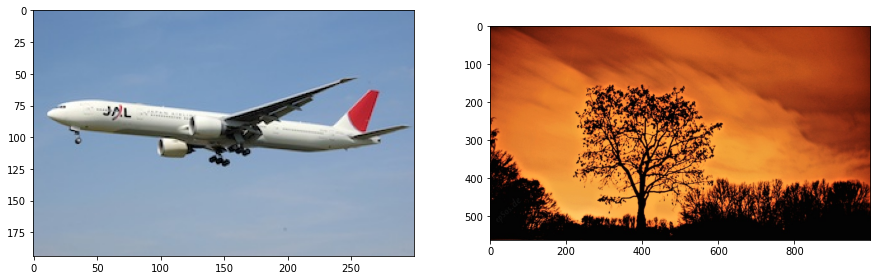

In [9]:
plt.figure(figsize=[15,10])
plt.subplot(121)
plt.imshow(src[:,:,::-1])
plt.subplot(122)
plt.imshow(dst[:,:,::-1])

In [11]:
# Create a rough mask around the airplane.
src_mask = np.zeros(src.shape, src.dtype)
poly = np.array([ [4,80], [30,54], [151,63], [254,37], [298,90], [272,134], [43,122] ], np.int32)
src_mask = cv2.fillPoly(src_mask, [poly], (255, 255, 255))

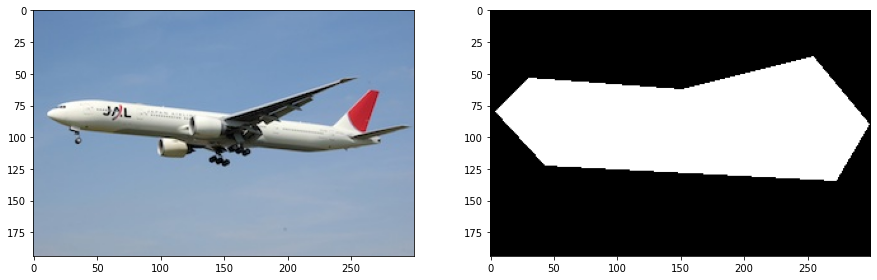

In [15]:
plt.figure(figsize=[15,10])
plt.subplot(121)
plt.imshow(src[:,:,::-1])
plt.subplot(122)
plt.imshow(src_mask[:,:,::-1])

In [ ]:
# This is where the CENTER of the airplane will be placed
center = (800,100)

In [ ]:
# Clone seamlessly.
output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)

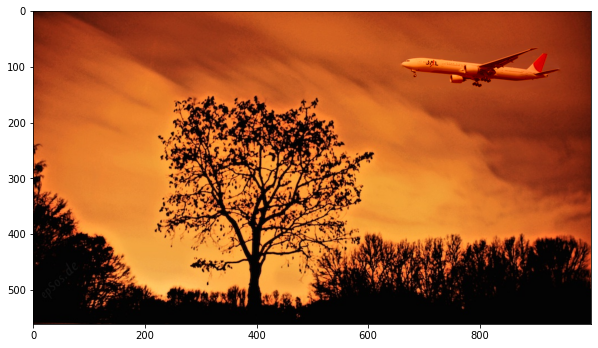

In [ ]:
plt.imshow(output[:,:,::-1])
plt.show()

In the above example, the cloning type ( `flags` ) I used was `NORMAL_CLONE`. There is another type, `MIXED_CLONE`, that is subtly different from `NORMAL_CLONE`. 

The `NORMAL_CLONE` method works well when inserting objects with complex outlines into a new background. But, it often leaves an undesirable halo. Mixed seamless cloning based on a loose selection proves effective in such cases.

[Seamless Cloning Types](https://docs.opencv.org/4.5.1/df/da0/group__photo__clone.html#gga86dd24f3d3ed87598739ef2ebe174bafa9aeff931a5d5d18b094397f0ca5bb85f)

## <font style = "color:rgb(50,120,229)">Normal Cloning ( NORMAL_CLONE ) versus Mixed Cloning ( MIXED_CLONE )</font>
    
I have a 5 year old son who gives me “I Love You” tickets if I treat him well. There was a time when kids yearned for their parent’s approval, but these days parents have to do their best to earn “I Love You” tickets. Anyway, back to cloning. I am going to use one of these “I Love You Tickets” in the service of Computer Vision (See Figure 4 ).

| <img src="https://www.learnopencv.com/wp-content/uploads/2015/02/iloveyouticket.jpg" alt="Input Image" width="600"/> |
| --- |
| <center>Figure 4: An “I Love You” Ticket.</center> |

Let’s try to clone this image onto a wooden texture shown in Figure 5. We will be lazy and use a source mask that is all white, and clone the source image right in the center of the wooden texture image.


| <img src="https://www.learnopencv.com/wp-content/uploads/2015/02/wood-texture.jpg" alt="Input Image" width="600"/> |
| --- |
| <center>FIgure 5 : Wood Texture</center> |

In [ ]:
# Read images : src image will be cloned into dst
im = cv2.imread("wood-texture.jpg")
obj= cv2.imread("iloveyouticket.jpg")

In [ ]:
# Create an all white mask
mask = 255 * np.ones(obj.shape, obj.dtype)

In [ ]:
# The location of the center of the src in the dst
width, height, channels = im.shape
center = (height//2, width//2)

In [ ]:
# Seamlessly clone src into dst and put the results in output
normal_clone = cv2.seamlessClone(obj, im, mask, center, cv2.NORMAL_CLONE)
mixed_clone = cv2.seamlessClone(obj, im, mask, center, cv2.MIXED_CLONE)

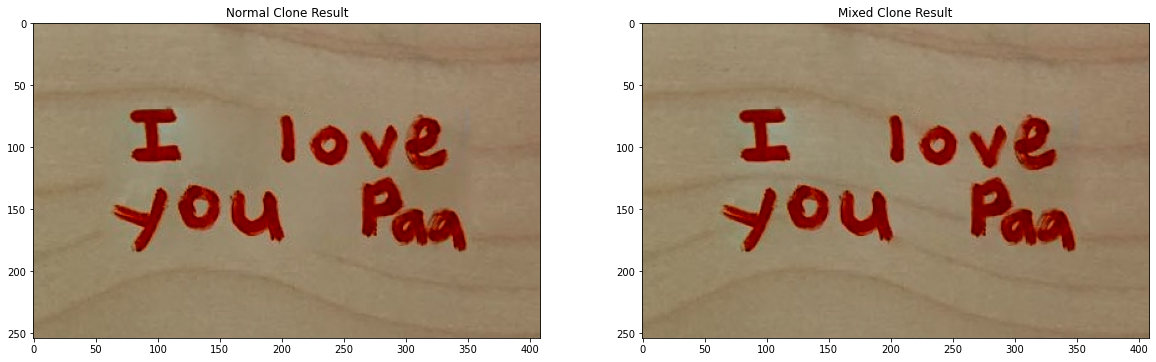

In [ ]:
plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
plt.title("Normal Clone Result")
plt.imshow(normal_clone[:,:,::-1])
plt.subplot(1,2,2)
plt.title("Mixed Clone Result")
plt.imshow(mixed_clone[:,:,::-1])
plt.show()

## <font style = "color:rgb(50,120,229)">Observations </font>
    
1. If we use Normal Cloning by using the `NORMAL_CLONE` flag, we did not use a good mask and you can see excessive smoothing between the words “I” and “Love”, and between “you” and “Paa”. Sure we were lazy. We could have created a rough mask and improved the result.  But if you are lazy and smart, you would use Mixed Cloning.
1. **In Normal Cloning the texture ( gradient ) of the source image is preserved in the cloned region.**
1. In Mixed Cloning, the texture ( gradient ) of the cloned region is determined by a combination of the source and the destination images. 
1. **Mixed Cloning does not produce smooth regions because it picks the dominant texture ( gradient ) between the source and destination images**. Notice the texture for mixed cloning is no longer smooth between “I” and “Love”, and “you” and “Paa”. Lazy people cheer!


# References

[Check out the Poisson Image Editing paper here for more details](https://www.cs.jhu.edu/~misha/Fall07/Papers/Perez03.pdf)